# 利用類神經網路來判斷員工是否離職 (binary classification problem)

底下的 %tensorflow_version 2.x 是所謂的 **魔術指令 (magic instruction)**. 

只要看到指令前有 ``%`` 符號的，就是魔術指令。魔術指令用來操作 colab。

``%tensorflow_version 2.x`` 是跟 colab 說，目前在這個 notebook 中，我要是要匯入 tensorflow 的話，請匯入 2.x 的版本。

Colab 目前支援 tensorflow 1.x 以及 2.x 版。2.x 版是在 2019 年正式 release，所以還很新。Colab **預設** 是支援 1.x 版。

若沒有特別指定的話，載入的是 1.x 版。

**注意: ** 在網路上會有文件教你/妳用 pip 的方式在 Colab 上裝 tensorflow 2.x。請不要使用這種方式，在 Google 的官方文件中有指出，這樣的方式會造成校能上的影響。因此建議使用 ``%tensorflow_version 2.x`` 的方式來處理。

In [1]:
%tensorflow_version 2.x

TensorFlow 2.x selected.


In [33]:
# import tensorflow and check out the version
import tensorflow
from tensorflow import keras
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
print(tensorflow.__version__)

2.1.0


## 欄位說明
- RowNumber: 列編號
- CustomerId: 客戶 id
- Surname: 姓
- CreditScore: 信用評級
- Geography: 所在區域
- Gender: 性別
- Age: 年齡
- Tenure: 成為客戶的時間
- Balance: 存款數
- NumOfProducts: 使用本銀行多少的產品
- HasCrCard: 是否有信用卡
- IsActiveMember: 是否為活躍用戶
- EstimatedSalary: 預估薪水
- Exited: 是否會不用本銀行的服務

Exited 欄位是我們要預估的結果。也就是說，我們要處理的是「分類」問題。

將客戶分成兩類：會離開，以及不會離開。

In [2]:
import pandas as pd
df = pd.read_csv("Churn_Modelling.csv")
df.head(10)

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0
5,6,15574012,Chu,645,Spain,Male,44,8,113755.78,2,1,0,149756.71,1
6,7,15592531,Bartlett,822,France,Male,50,7,0.00,2,1,1,10062.80,0
7,8,15656148,Obinna,376,Germany,Female,29,4,115046.74,4,1,0,119346.88,1
8,9,15792365,He,501,France,Male,44,4,142051.07,2,0,1,74940.50,0
9,10,15592389,H?,684,France,Male,27,2,134603.88,1,1,1,71725.73,0


In [3]:
df.shape

(10000, 14)

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

## Split $x$ and $y$

In [5]:
x = df[['CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary']]
y = df[['Exited']]

In [6]:
#如果嫌 x = df[['CreditScore', 'Geography',
#       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
#       'IsActiveMember', 'EstimatedSalary']]
#這樣寫太長的話，底下是另一種寫法
#3 是 CreditScore 的索引值， 12 是 EstimatedSalary 的索引值。所以 3:12 就是取
#CreditScore 到 EstimatedSalary 間所有的欄位值 
x1 = df.iloc[:, 3:12]
x1.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember
0,619,France,Female,42,2,0.00,1,1,1
1,608,Spain,Female,41,1,83807.86,1,0,1
2,502,France,Female,42,8,159660.80,3,1,0
3,699,France,Female,39,1,0.00,2,0,0
4,850,Spain,Female,43,2,125510.82,1,1,1
5,645,Spain,Male,44,8,113755.78,2,1,0
6,822,France,Male,50,7,0.00,2,1,1
7,376,Germany,Female,29,4,115046.74,4,1,0
8,501,France,Male,44,4,142051.07,2,0,1
9,684,France,Male,27,2,134603.88,1,1,1


In [7]:
x.head(10)

,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,France,Female,42,2,0.00,1,1,1,101348.88
1,608,Spain,Female,41,1,83807.86,1,0,1,112542.58
2,502,France,Female,42,8,159660.80,3,1,0,113931.57
3,699,France,Female,39,1,0.00,2,0,0,93826.63
4,850,Spain,Female,43,2,125510.82,1,1,1,79084.10
5,645,Spain,Male,44,8,113755.78,2,1,0,149756.71
6,822,France,Male,50,7,0.00,2,1,1,10062.80
7,376,Germany,Female,29,4,115046.74,4,1,0,119346.88
8,501,France,Male,44,4,142051.07,2,0,1,74940.50
9,684,France,Male,27,2,134603.88,1,1,1,71725.73


## 替 Geography	以及 Gender 編碼

Geography 以及 Gender 都是類別變數，將之轉換為數值型態。

之後進行 one-hot encoding


In [8]:
from sklearn.preprocessing import LabelEncoder
lc = LabelEncoder() # 建構一個 labelEncoder 工廠
x.Geography = lc.fit_transform(x.Geography)
x.head(10)

C:\Users\justi\anaconda3\envs\MLCourse\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,Female,42,2,0.00,1,1,1,101348.88
1,608,2,Female,41,1,83807.86,1,0,1,112542.58
2,502,0,Female,42,8,159660.80,3,1,0,113931.57
3,699,0,Female,39,1,0.00,2,0,0,93826.63
4,850,2,Female,43,2,125510.82,1,1,1,79084.10
5,645,2,Male,44,8,113755.78,2,1,0,149756.71
6,822,0,Male,50,7,0.00,2,1,1,10062.80
7,376,1,Female,29,4,115046.74,4,1,0,119346.88
8,501,0,Male,44,4,142051.07,2,0,1,74940.50
9,684,0,Male,27,2,134603.88,1,1,1,71725.73


In [9]:
x.Gender = lc.fit_transform(x.Gender)
x.head(10)

C:\Users\justi\anaconda3\envs\MLCourse\lib\site-packages\pandas\core\generic.py:5303: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[name] = value


,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,619,0,0,42,2,0.00,1,1,1,101348.88
1,608,2,0,41,1,83807.86,1,0,1,112542.58
2,502,0,0,42,8,159660.80,3,1,0,113931.57
3,699,0,0,39,1,0.00,2,0,0,93826.63
4,850,2,0,43,2,125510.82,1,1,1,79084.10
5,645,2,1,44,8,113755.78,2,1,0,149756.71
6,822,0,1,50,7,0.00,2,1,1,10062.80
7,376,1,0,29,4,115046.74,4,1,0,119346.88
8,501,0,1,44,4,142051.07,2,0,1,74940.50
9,684,0,1,27,2,134603.88,1,1,1,71725.73


In [10]:
#替 Geography 做 One-hot encoding
x = pd.get_dummies(x, prefix='Geo', prefix_sep='_', columns=['Geography'], drop_first=True)
x.head()

,CreditScore,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Geo_1,Geo_2
0,619,0,42,2,0.00,1,1,1,101348.88,0,0
1,608,0,41,1,83807.86,1,0,1,112542.58,0,1
2,502,0,42,8,159660.80,3,1,0,113931.57,0,0
3,699,0,39,1,0.00,2,0,0,93826.63,0,0
4,850,0,43,2,125510.82,1,1,1,79084.10,0,1


## Split training set and testing set

In [11]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

## Standardization

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
x_train = sc.fit_transform(x_train)
x_test = sc.transform(x_test)

In [13]:
x_train.shape

(7000, 11)

In [14]:
model = keras.models.Sequential()
#first input layer
model.add(keras.layers.Dense(6, input_dim=11, activation='relu'))
#second hidden layer
model.add(keras.layers.Dense(6, activation='relu'))
#output layer
model.add(keras.layers.Dense(1, activation='sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 6)                 72        
_________________________________________________________________
dense_1 (Dense)              (None, 6)                 42        
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 7         
Total params: 121
Trainable params: 121
Non-trainable params: 0
_________________________________________________________________


In [15]:
model.layers

In [16]:
model.compile(loss='binary_crossentropy', optimizer='sgd', metrics=['accuracy'])

In [17]:
history = model.fit(x_train, y_train, epochs=100, verbose=2)

Train on 7000 samples
Epoch 1/100
7000/7000 - 1s - loss: 0.5362 - accuracy: 0.7977
Epoch 2/100
7000/7000 - 0s - loss: 0.5033 - accuracy: 0.7977
Epoch 3/100
7000/7000 - 0s - loss: 0.4878 - accuracy: 0.7977
Epoch 4/100
7000/7000 - 0s - loss: 0.4779 - accuracy: 0.7977
Epoch 5/100
7000/7000 - 0s - loss: 0.4707 - accuracy: 0.7977
Epoch 6/100
7000/7000 - 0s - loss: 0.4650 - accuracy: 0.7977
Epoch 7/100
7000/7000 - 0s - loss: 0.4601 - accuracy: 0.7977
Epoch 8/100
7000/7000 - 0s - loss: 0.4559 - accuracy: 0.7977
Epoch 9/100
7000/7000 - 0s - loss: 0.4521 - accuracy: 0.7977
Epoch 10/100
7000/7000 - 0s - loss: 0.4487 - accuracy: 0.7977
Epoch 11/100
7000/7000 - 0s - loss: 0.4454 - accuracy: 0.7977
Epoch 12/100
7000/7000 - 0s - loss: 0.4424 - accuracy: 0.7977
Epoch 13/100
7000/7000 - 0s - loss: 0.4397 - accuracy: 0.7977
Epoch 14/100
7000/7000 - 0s - loss: 0.4373 - accuracy: 0.7977
Epoch 15/100
7000/7000 - 0s - loss: 0.4352 - accuracy: 0.7979
Epoch 16/100
7000/7000 - 0s - loss: 0.4333 - accuracy: 0.

## Evalute the performance of the model

In [22]:
eloss,eacc = model.evaluate(x_test, y_test)
print(f'Loss on the testing set is: {eloss}')
print(f'Accuracy on the testing set is:{eacc}')

3000/3000 [==============================] - 0s 20us/sample - loss: 0.3402 - accuracy: 0.8577
Loss on the testing set is: 0.3402487239042918
Accuracy on the testing set is:0.8576666712760925


## Prediction

- predict: Generates output predictions for the input samples.
- predict_classes: Generate class predictions for the input samples batch by batch.

- predict: 替 test 資料集中的每一筆資料做分類，並輸出分類的機率。在本例中因為是使用二元分類，所以機率值 < 0.5，代表 0，機率值 >= 0.5 代表1
- predict_classes: 替 test 資料集中的每一筆資料做分類。在本例中，因為是二元分類，所以會輸出 0 或是 1。

In [23]:
y_pred = model.predict(x_test)
y_pred

array([[0.2935293 ],
       [0.38129053],
       [0.31523368],
       ...,
       [0.14366773],
       [0.15089469],
       [0.71680766]], dtype=float32)

In [28]:
y_pred_class = model.predict_classes(x_test)
y_pred_class

array([[0],
       [0],
       [0],
       ...,
       [0],
       [0],
       [1]])

## Draw the confusion matrix

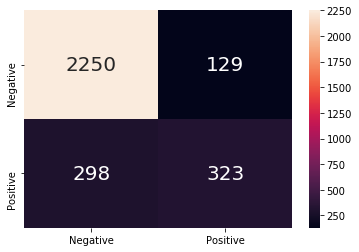

In [37]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_class)
df_cm = pd.DataFrame(cm, index = ['Negative', 'Positive'],
                  columns = ['Negative', 'Positive'])
# fmt = 'd' means that we use integer to show the values in the heatmap
sns.heatmap(df_cm, annot = True, annot_kws = {'size':20}, fmt = 'd')

In [38]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred_class))

              precision    recall  f1-score   support

           0       0.88      0.95      0.91      2379
           1       0.71      0.52      0.60       621

    accuracy                           0.86      3000
   macro avg       0.80      0.73      0.76      3000
weighted avg       0.85      0.86      0.85      3000



## History object

Model.fit() returns a ``History`` object. Its ``History.history`` attribute is a record of training loss values and metrics values at successive epochs, as well as validation loss values and validation metrics values (if applicable).

Model.fit() 會回傳一個 ``History`` 物件。History 中包含一個叫 history 的屬性 (即 History.history，是的，這個名字取得蠻不直覺，而且拗口)，其中包含了訓練過程中的 loss 值，以及對應的 metrics。  
在本例中，我們設定的 metrics 是 accuracy，所以 History.history 中也有訓練過程中 accuracy 的變化。

``history.history`` 是一個字典，以 key-value 的方式呈現資料。

- history.history['loss'] 可以取得所有的 loss value
- history.history['accuracy'] 可以取得所有的 accuracy 變化

In [39]:
history.history

{'loss': [0.5362292260442462,
  0.5033354452678136,
  0.4878141998904092,
  0.4779109263079507,
  0.4707189540863037,
  0.46499346487862725,
  0.4600922723497663,
  0.45587814279964994,
  0.4521325706754412,
  0.4486931188787733,
  0.445414192540305,
  0.44244159528187343,
  0.43968346677507675,
  0.43729571189199173,
  0.4351507700511387,
  0.4332681023393358,
  0.43149946328571864,
  0.42998809593064446,
  0.42864890360832214,
  0.4274473714828491,
  0.4265451679910932,
  0.42567790365219116,
  0.42487931503568377,
  0.42413816252776554,
  0.42349135984693254,
  0.42274977135658265,
  0.4221049893924168,
  0.421392637695585,
  0.42073749668257576,
  0.4200642821788788,
  0.41938753386906213,
  0.41863559985160825,
  0.41787681678363253,
  0.4170438017845154,
  0.416171041403498,
  0.41521633679526193,
  0.414375166790826,
  0.4132810343333653,
  0.4123452257769448,
  0.41110037173543656,
  0.4099321917125157,
  0.40870460152626037,
  0.40726423839160375,
  0.40616683874811443,
  0.40

In [40]:
history.history['accuracy']

[0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.7977143,
 0.79785717,
 0.7982857,
 0.79985714,
 0.8025714,
 0.80485713,
 0.8075714,
 0.8092857,
 0.80985713,
 0.8094286,
 0.81128573,
 0.81214285,
 0.813,
 0.81357145,
 0.8122857,
 0.81214285,
 0.813,
 0.813,
 0.814,
 0.81528574,
 0.815,
 0.81514287,
 0.8162857,
 0.8174286,
 0.818,
 0.8197143,
 0.821,
 0.8222857,
 0.82442856,
 0.82514286,
 0.82542855,
 0.8281429,
 0.82785714,
 0.82914287,
 0.83,
 0.833,
 0.83285713,
 0.83428574,
 0.836,
 0.8388571,
 0.8402857,
 0.84114283,
 0.8427143,
 0.843,
 0.84414285,
 0.84585714,
 0.84414285,
 0.84885716,
 0.8497143,
 0.85057145,
 0.85385716,
 0.8528572,
 0.85557145,
 0.85514283,
 0.8568571,
 0.8602857,
 0.85957146,
 0.85957146,
 0.8585714,
 0.85957146,
 0.8618571,
 0.86142856,
 0.8612857,
 0.86285716,
 0.86228573,
 0.86314285,
 0.86071426,
 0.861,
 0.8612857,
 0.86142856,
 0.863,
 0.8608571

In [42]:
# 將 history.hostory 塞入 dataframe 中
dfResult = pd.DataFrame(history.history)
dfResult.head(8)

,loss,accuracy
0,0.536229,0.797714
1,0.503335,0.797714
2,0.487814,0.797714
3,0.477911,0.797714
4,0.470719,0.797714
5,0.464993,0.797714
6,0.460092,0.797714
7,0.455878,0.797714


In [43]:
# dataframe 中有 100 筆資料，因為在我們的例子中 epoch 設為 100 (即訓練 100 輪), 所以會有 100 筆資料
dfResult.shape

(100, 2)

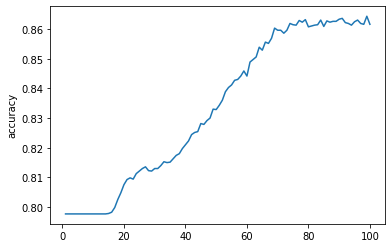

In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

ax = sns.lineplot(x=range(1,101), y=dfResult.accuracy)
